In [1]:
import torch 
import torchdrift 
import torchvision
from torch.utils.data import Dataset
def corruption_function(x: torch.Tensor):
    return torchdrift.data.functional.gaussian_blur(x, severity=2)

val_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(768,1024)),
    # torchvision.transforms.CenterCrop(size=(224, 224)),
    torchvision.transforms.ToTensor()])
val_dataset = torchvision.datasets.ImageFolder('./landscape_images/',transform=val_transform)

def collate_fn(self, batch):
        batch = torch.utils.data._utils.collate.default_collate(batch)
        if self.additional_transform:
            batch = (self.additional_transform(batch[0]), *batch[1:])
        return batch    

                                       
def val_dataloader(dataset: Dataset):
        return torch.utils.data.DataLoader(dataset, batch_size=200,num_workers=1, shuffle=True, collate_fn=None)                                                                

/home/jinglewsl/miniconda3/envs/torchANDwhy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
inputs, _ = next(iter(val_dataloader(val_dataset)))

type(inputs)

torch.Tensor

In [3]:

inputs_ood = corruption_function(inputs)

In [4]:
N = 2

inps = torch.cat([inputs[:N], inputs_ood[:N]])


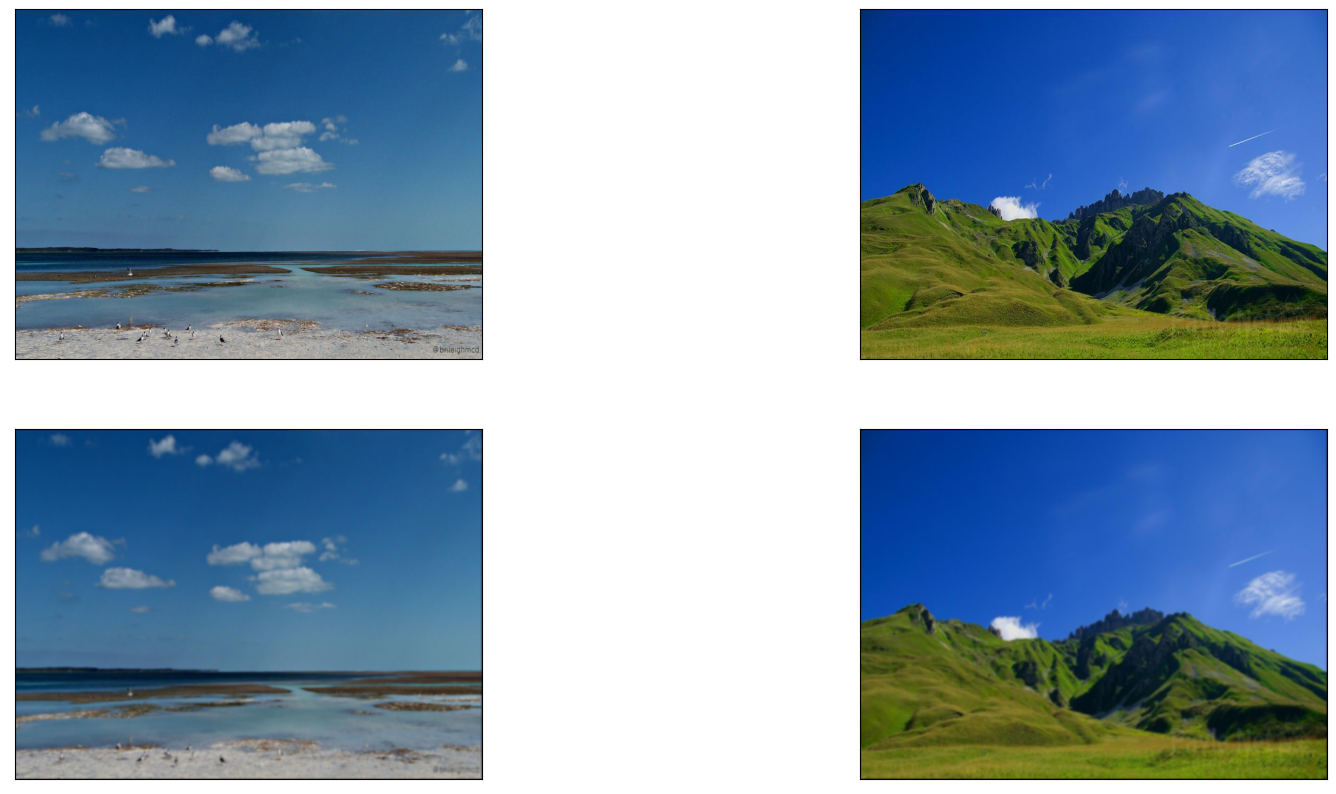

In [5]:
%matplotlib inline
from matplotlib import pyplot

pyplot.figure(figsize=(20, 10))
for i in range(2 * N):
    pyplot.subplot(2, N, i + 1)
    pyplot.imshow(inps[i].permute(1, 2, 0))
    pyplot.xticks([])
    pyplot.yticks([])

In [9]:
type(inputs_ood)

torch.Tensor

In [11]:
len(inputs_ood)

200

In [6]:
# define a transform to convert a tensor to PIL image
transform = torchvision.transforms.ToPILImage()

# convert the tensor to PIL image using above transform
blurred_imgs =  [transform(tensor) for tensor in inputs_ood]

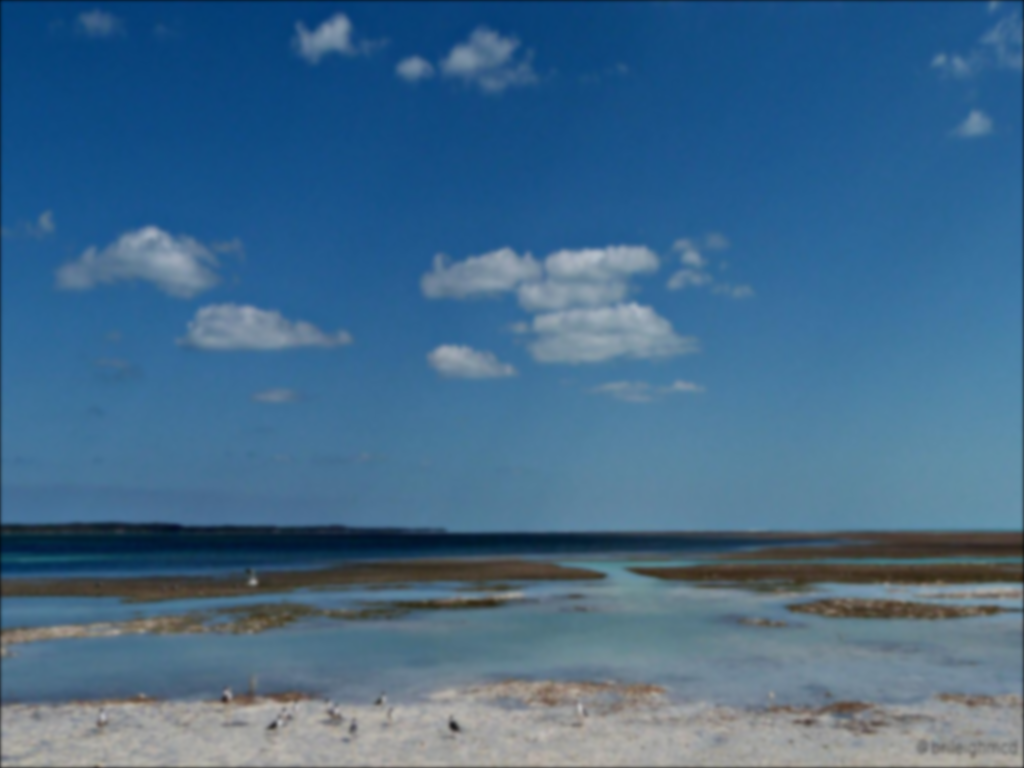

(1024, 768)


In [7]:
from PIL import Image
from IPython.display import display
# display the PIL image
test = blurred_imgs[0]

display(test)

print(test.size)

In [8]:
# make images of the tensor
imgs =  [transform(tensor) for tensor in inputs]

In [16]:
i=0
for img in imgs:
    i +=1
    outfile = "/home/jinglewsl/evoila/sandbox/whylogs_v1/output/"+ str(i) + ".png"
    try:
        img.save(outfile)
    except Exception as e:
        print(e)


In [17]:
imgs_blurred = [transform(tensor) for tensor in inputs_ood]

In [18]:
i=0
for img in imgs_blurred:
    i +=1
    outfile = "/home/jinglewsl/evoila/sandbox/whylogs_v1/output/landscape_from_tensor_blurred/"+ str(i) + ".png"
    try:
        img.save(outfile)
    except Exception as e:
        print(e)
